<a href="https://colab.research.google.com/github/thaohh69/Analyzing-Visualizing-Data-PowerBI/blob/master/Project_Google_Apps_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this mini project, you will explore and analyze the Google Apps dataset. There is no question so you will have to be self motivated in finding out what you want to know about this data, what looks interesting to you and what results to want to communicate.

We will provide some questions and examples as initial guidance. You can (and should) also discuss with the tutors and other class mates on ideas, things you want to achieve and Python techniques during class.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
apps = pd.read_csv('gdrive/My Drive/google_apps/googleplaystore.csv')

In [0]:
apps.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

### One of the greatest qualities of a data analyst is the ability to ask questions yourself. Be curious about your data.

Below is a suggested workflow and some questions to motivate you. Try to think of other questions as well.

1- Inspect the data, calculate some statistics and write some comments on interesting observations.


2- Data cleaning:
    - Use string slicing and string methods to change columns like 'Size', 'Installs', 'Price', ... to numbers
    - Remove duplicate rows


3- Visualize and comment on some or all columns. For example:
    - Which categories have the most apps? Which categories are most popular (by installs)?
    - What is the range of application size (maybe using a boxplot?)
    - Visualize the distribution of price for paid apps only
    - How many apps have multiple genres?
    - Plot a bar chart for Last Updated by year


4- More possibly interesting questions to explore:
    - Can you make a scatter plot to show the relationship between rating and number of installs?
    - Do free apps have more installs than paid apps on average?
    - Which categories appear the most among top 100 most expensive apps?
    - Can you show the top 100 most common words that appear in apps name?

5- Alternatively, you can also pick a category that you like and do in-depth analysis on that category. For example: Game apps
    - Make a chart that shows the relationship between price, ratings and review.
    - What are the most popular genres?
    - Are games that support more android devices more popular?

1- Inspect the data, calculate some statistics and write some comments on interesting observations.

In [0]:
#Inspect data 
apps.describe()


Rating       Reviews
count  9367.000000  1.084100e+04
mean      4.191513  4.441119e+05
std       0.515735  2.927629e+06
min       1.000000  0.000000e+00
25%       4.000000  3.800000e+01
50%       4.300000  2.094000e+03
75%       4.500000  5.476800e+04
max       5.000000  7.815831e+07

In [0]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [0]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
apps.shape

(10841, 13)

2- Data cleaning: - Use string slicing and string methods to change columns like 'Size', 'Installs', 'Price', ... to numbers - Remove duplicate rows

In [0]:
#Change column Price
apps['Price'] = apps['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
apps['Price'] = apps['Price'].apply(lambda x: float(x))

In [0]:
#Change column Installs
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: int(x))

In [0]:
#Change column Review
apps['Reviews'] = apps['Reviews'].apply(lambda x: int(x))

The"Size" column as it needs more actions. This column contains various types of data. It consits of data types, eg: Mb or Kb, there are null values and strings 

In [0]:
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(x))

In [0]:
apps.head(10)


App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up
5                         Paper flowers instructions  ...    2.3 and up
6            Smoke Effect Photo Maker - Smoke Editor  ...  4.0.3 and up
7                                   Infinite Painter  ...    4.2 and up
8                               Garden Coloring Book  ...    3.0 and up
9                      Kids Paint Free - Drawing Fun  ...  4.0.3 and up

[10 rows x 13 columns]

In [0]:
apps.dtypes


App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              9146 non-null float64
Installs          10841 non-null int64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


Extract exactly numbers of unique apps and available categories in dataset

In [0]:
len(apps.App.unique())

9660

In [0]:
uni_categories = apps.Category.unique()
uni_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [0]:
#Remove duplicate rows
apps.drop_duplicates(keep='first', inplace=True)

In [0]:
apps.shape

(10358, 13)

In [0]:
#Check null values
apps.isnull().sum().sort_values(ascending=False)

Size              1526
Rating            1465
Current Ver          8
Android Ver          2
Genres               1
Type                 1
Category             1
Last Updated         0
Content Rating       0
Price                0
Installs             0
Reviews              0
App                  0
dtype: int64

In [0]:
apps.dropna(how='any', inplace=True)

In [0]:
apps.shape

(7418, 13)

In [0]:
apps.Price.unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

3 - Visualize and comment on some or all columns. For example: - Which categories have the most apps? Which categories are most popular (by installs)? - What is the range of application size (maybe using a boxplot?) - Visualize the distribution of price for paid apps only - How many apps have multiple genres? - Plot a bar chart for Last Updated by year

In [0]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [0]:
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from IPython.display import Image
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
py.init_notebook_mode()

3.1 Which categories have the most apps?

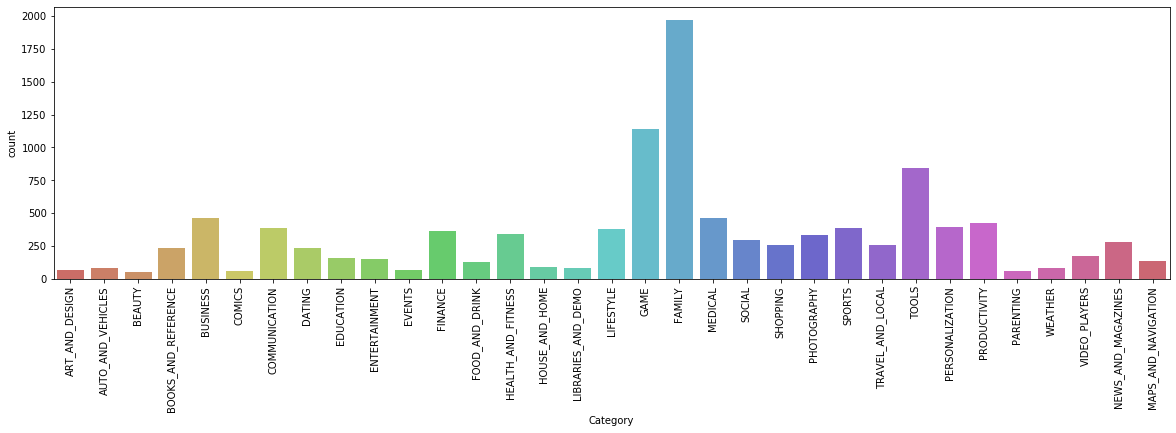

In [0]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=apps['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

As we can see that, Family and Game are the top 2 categories have the most apps


3.2 Which categories are most popular by installs?

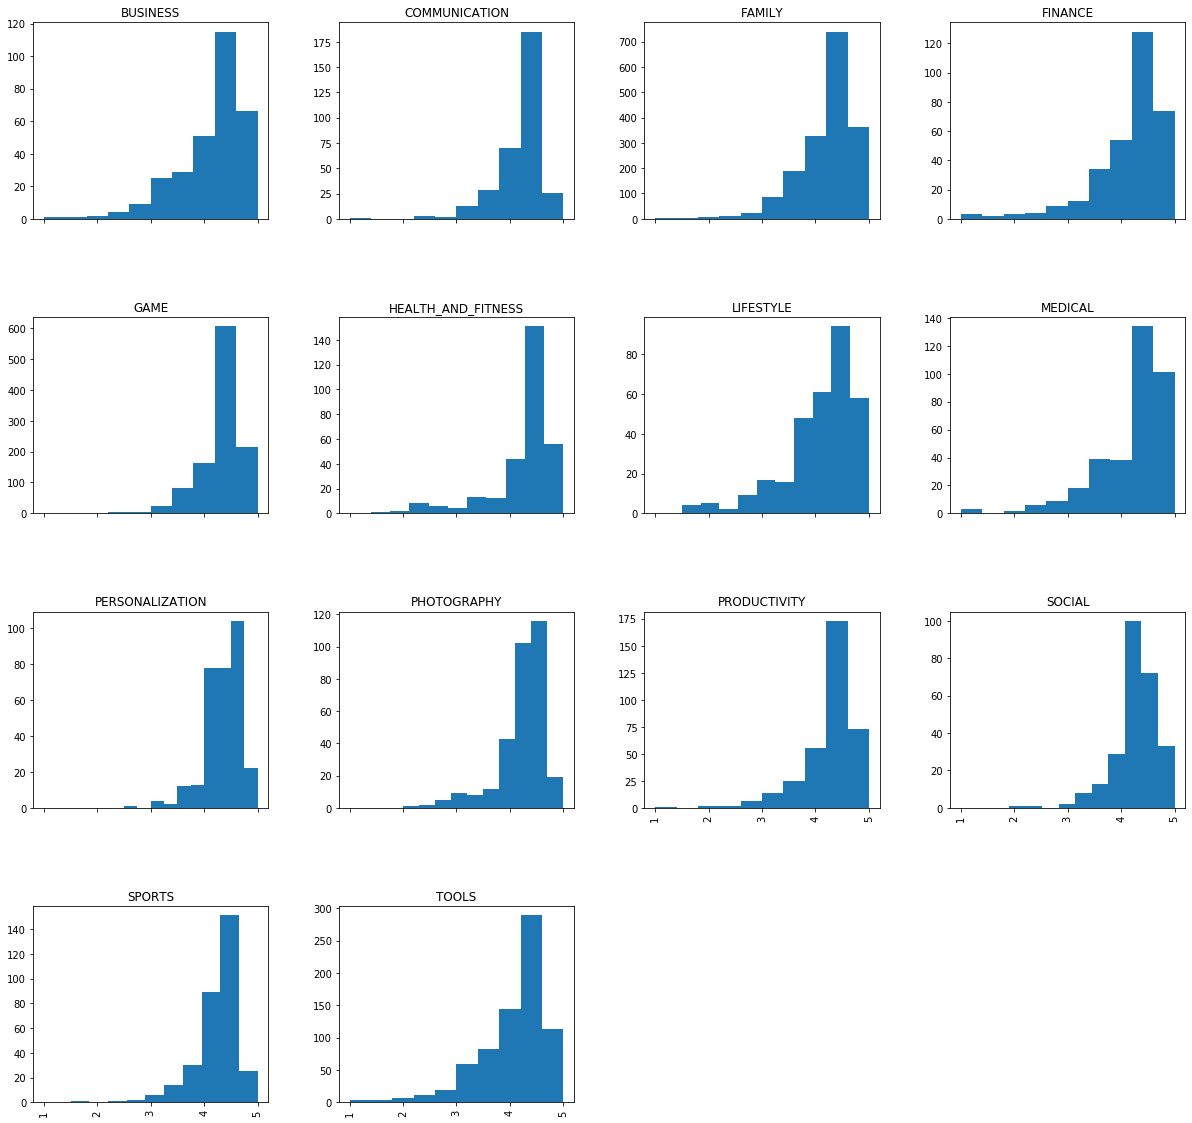

In [0]:
groups = apps.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [0]:
#Average ratings of all applications
avg_rate_data = go.Figure()
avg_rate_data.add_histogram(
        x = apps.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :6}
)

iplot(avg_rate_data)

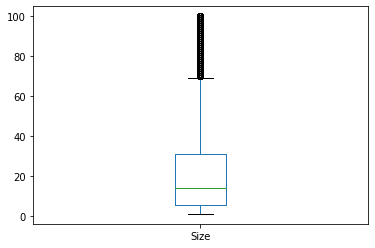

In [0]:
#Visualize the range of size
apps.Size.plot.box()

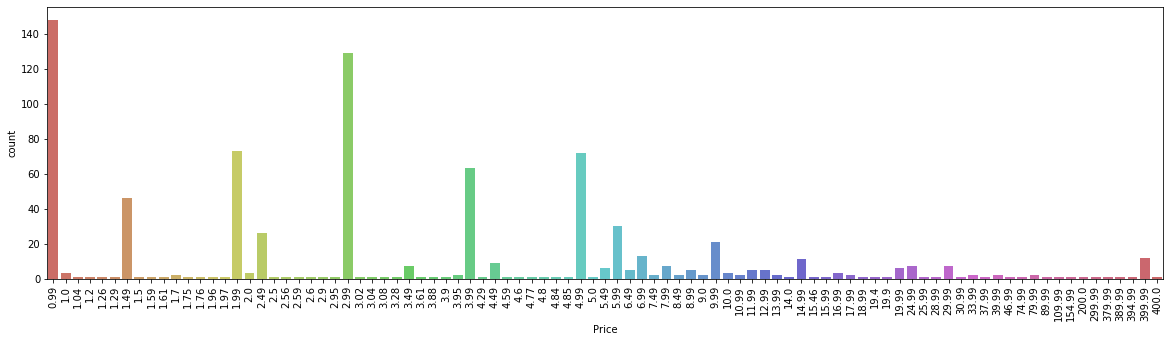

In [0]:
#Visualize the price for paid apps only
paid_apps = apps[apps.Price>0]
plt.figure(figsize=(20,5))
fig = sns.countplot(x=paid_apps['Price'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

Only few apps have a price higher than $20

3.3 How many apps have multiple genres ?

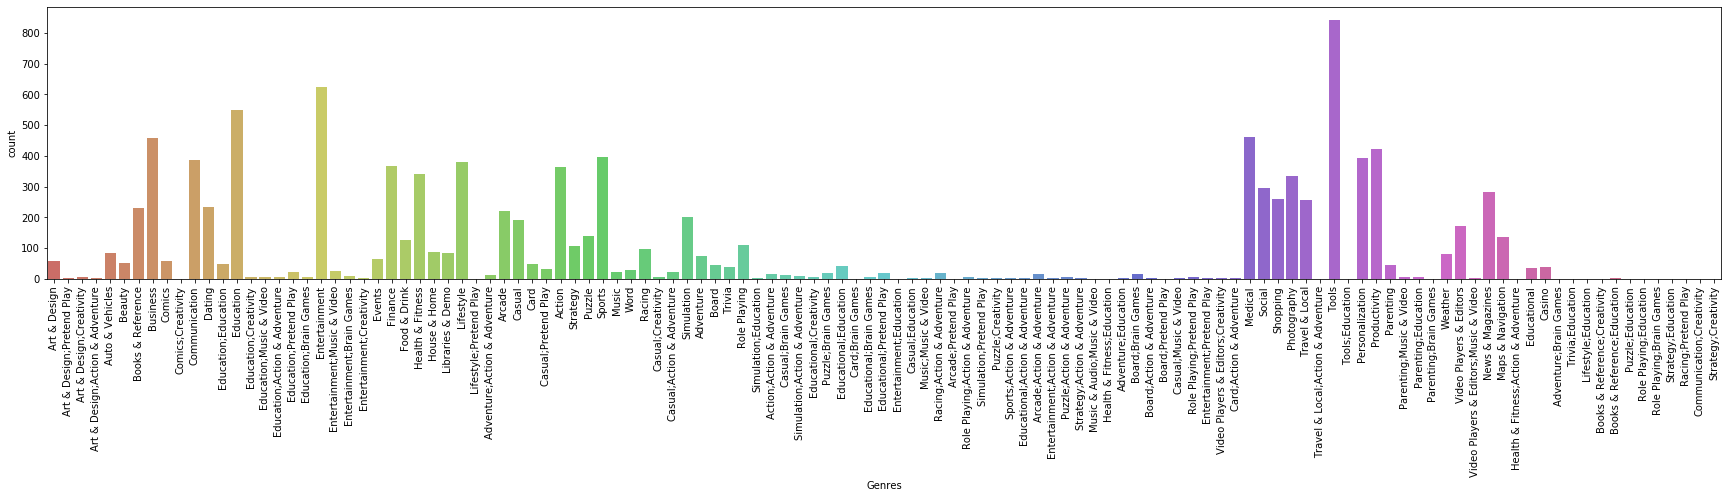

In [0]:
plt.figure(figsize=(30,5))
fig = sns.countplot(x=apps['Genres'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

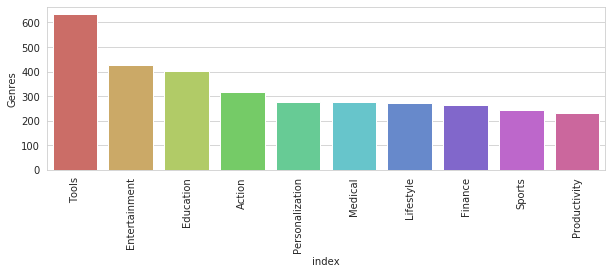

In [0]:
plt.figure(figsize=(10,3))
fig = sns.barplot(y=apps['Genres'].value_counts().reset_index()[:10]['Genres'], x=apps['Genres'].value_counts().reset_index()[:10]['index'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

4 - More possibly interesting questions to explore: - Can you make a scatter plot to show the relationship between rating and number of installs? - Do free apps have more installs than paid apps on average? - Which categories appear the most among top 100 most expensive apps? - Can you show the top 100 most common words that appear in apps name?

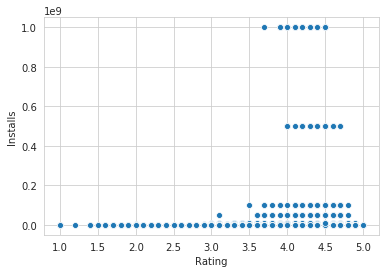

In [0]:
#Scatter plot to show the relationship between rating and number of installs?
sns.scatterplot(x='Rating', y='Installs', data=apps)

In [0]:
#Do free apps have more installs than paid apps on average?
import plotly.graph_objs as go

x0 = apps[apps['Type'] == 'Free']['Rating']
x1 = apps[apps['Type'] == 'Paid']['Rating']

trace0 = go.Box(
    x=x0,
    name='Free'
)
trace1 = go.Box(
    x=x1,
    name='Paid'
)
data_type_rating = [trace0, trace1]
py.iplot(data_type_rating)



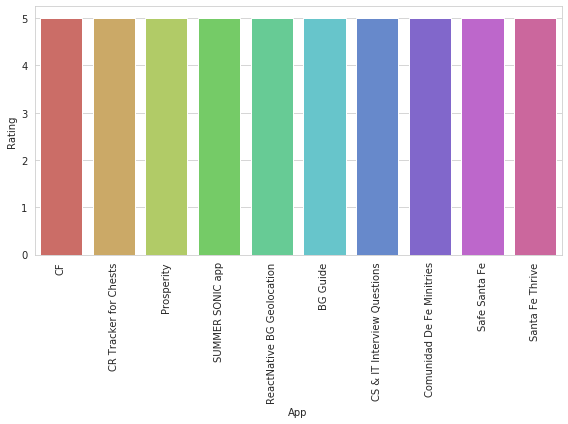

In [0]:
#Top 10 games have highest rating

sorted_by_rating = apps.sort_values(by=['Rating'], ascending=False)
sorted_by_rating.head()

plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_rating['App'][:10], y=sorted_by_rating['Rating'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

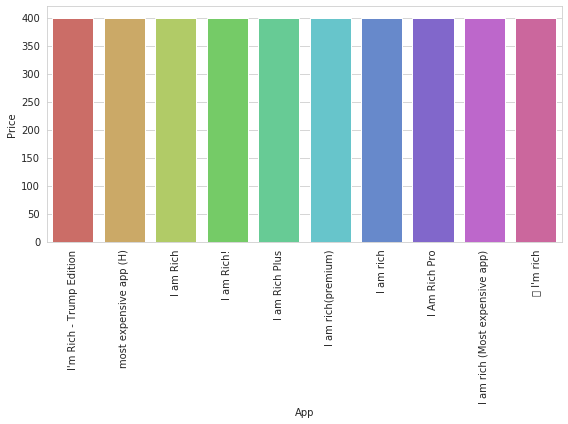

In [0]:
#Top 10 highest expensive apps
sorted_by_price = apps.sort_values(by=['Price'], ascending=False)
sorted_by_price.head()

plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_price['App'][:10], y=sorted_by_price['Price'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



IndexError: ignored

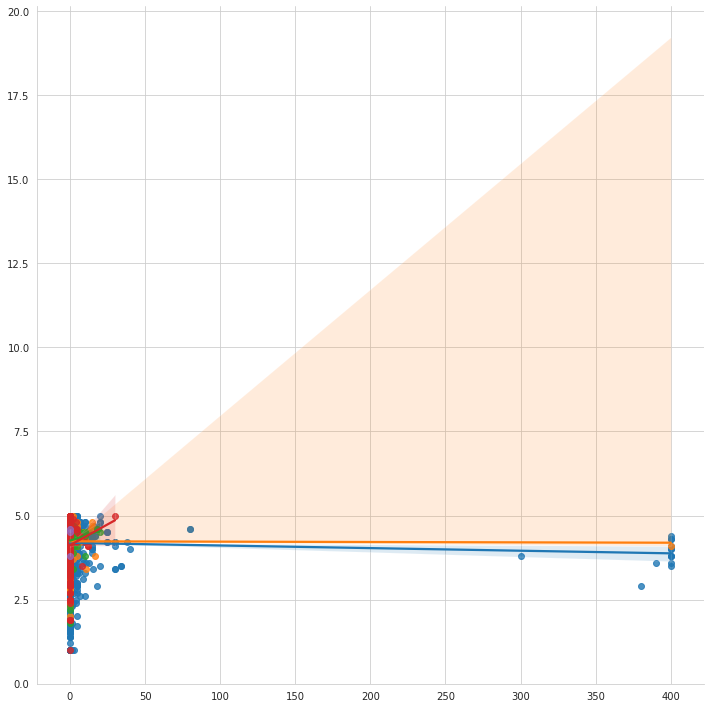

In [0]:
#How is price impacting the app rating?
ax = sns.lmplot(x="Price", y="Rating", hue = 'Content Rating', data=apps, size = 10)
ax.set(xlim=(-20, 450))
ax.set(ylim=(0, 7))
plt.show()

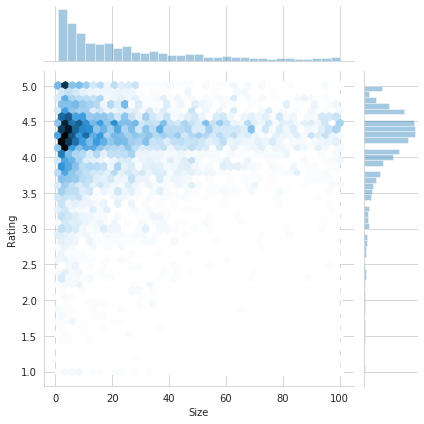

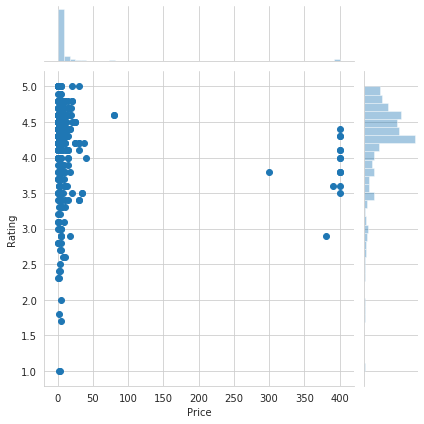

In [0]:
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')


# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

App   Category   Price
4197             most expensive app (H)     FAMILY  399.99
4362                         💎 I'm rich  LIFESTYLE  399.99
4367           I'm Rich - Trump Edition  LIFESTYLE  400.00
5351                          I am rich  LIFESTYLE  399.99
5354                     I am Rich Plus     FAMILY  399.99
5355                      I am rich VIP  LIFESTYLE  299.99
5356                  I Am Rich Premium    FINANCE  399.99
5357                I am extremely Rich  LIFESTYLE  379.99
5358                         I am Rich!    FINANCE  399.99
5359                 I am rich(premium)    FINANCE  399.99
5362                      I Am Rich Pro     FAMILY  399.99
5364     I am rich (Most expensive app)    FINANCE  399.99
5366                          I Am Rich     FAMILY  389.99
5369                          I am Rich    FINANCE  399.99
5373                 I AM RICH PRO PLUS    FINANCE  399.99
9917                        Eu Sou Rico    FINANCE  394.99
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE  399.99

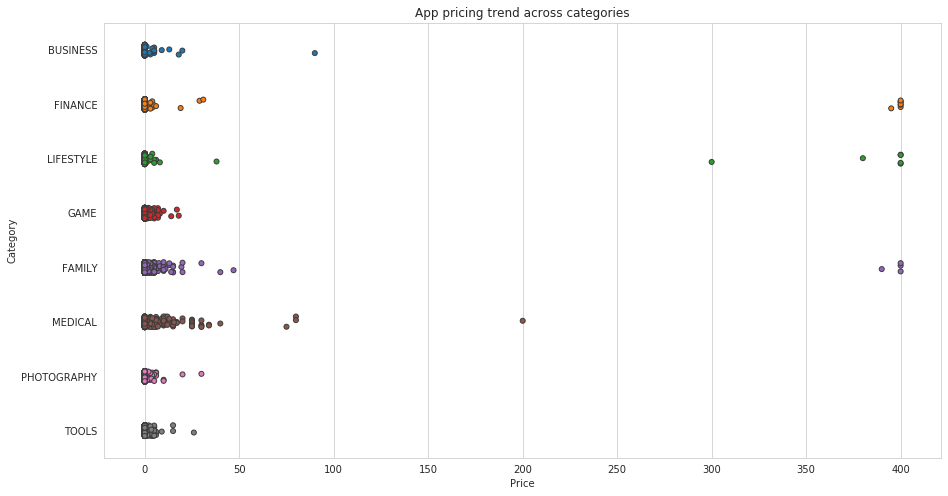

In [0]:
#App Price by Categories

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = apps[['App', 'Category', 'Price']].loc[apps['Price'] > 200]
apps_above_200

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

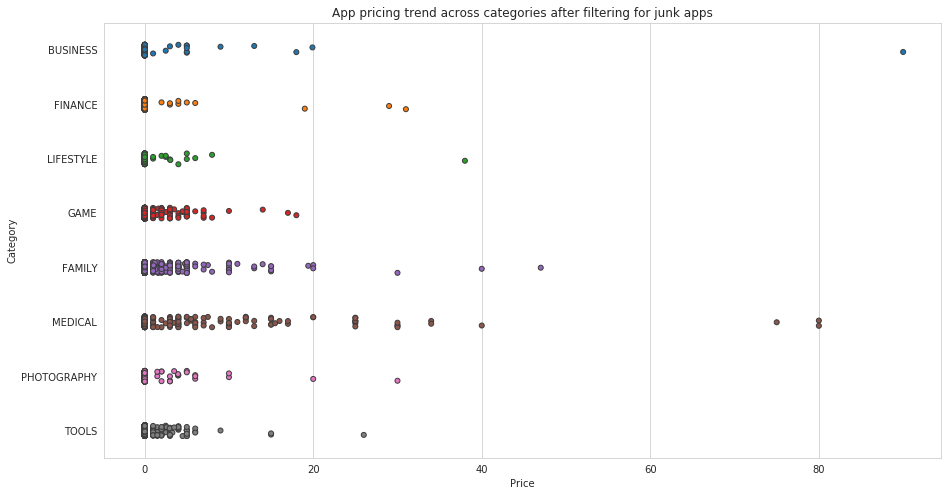

In [0]:
# Select apps priced below $100
apps_under_100 = popular_app_cats.loc[popular_app_cats['Price'] <=100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [0]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [0]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
iplot({'data': data, 'layout': layout})

### Remember to comment something after you produce a statistic table or chart to summarize the results or discuss things that you found interesting.

Communication is also an important skill in data analysis. Without meaningful summary and comments, people won't understand your beautiful chart.

<p style="color:green;">Example</p>

Group the data by category and explore the average rating

In [0]:
gb = apps.groupby('Category')

cat_mean = gb.mean()

cat_mean

Rating       Reviews       Size      Installs     Price
Category                                                                      
ART_AND_DESIGN       4.381034  1.874517e+04  12.939655  1.710829e+06  0.102931
AUTO_AND_VEHICLES    4.147619  1.575057e+04  21.541286  6.947587e+05  0.000000
BEAUTY               4.291892  5.020243e+03  15.513514  3.626000e+05  0.000000
BOOKS_AND_REFERENCE  4.321678  2.774949e+04  14.228112  9.425465e+05  0.146084
BUSINESS             4.100000  2.412200e+04  14.010596  2.185702e+06  0.228533
COMICS               4.130612  1.254822e+04  13.158224  3.578796e+05  0.000000
COMMUNICATION        4.097573  4.324115e+05  12.338364  1.619862e+07  0.202573
DATING               3.959574  1.988170e+04  17.597872  7.460455e+05  0.106241
EDUCATION            4.380000  5.682828e+04  20.035600  2.191600e+06  0.189053
ENTERTAINMENT        4.155224  1.632927e+05  22.638806  1.117851e+07  0.044627
EVENTS               4.478947  3.321605e+03  14.432474  2.802211e+05  0.000000
FAMILY               4.189308  1.814248e+05  29.751323  4.211832e+06  1.404025
FINANCE              4.109125  3.941383e+04  18.611293  1.203754e+06  9.277072
FOOD_AND_DRINK       4.098780  5.010204e+04  24.057317  2.092290e+06  0.060854
GAME                 4.265693  1.258313e+06  45.102138  2.794833e+07  0.286111
HEALTH_AND_FITNESS   4.206533  4.305826e+04  23.056834  4.037468e+06  0.172965
HOUSE_AND_HOME       4.128000  1.983304e+04  17.678000  1.029640e+06  0.000000
LIBRARIES_AND_DEMO   4.204918  1.632359e+04  12.701303  9.833279e+05  0.000000
LIFESTYLE            4.093040  3.170910e+04  15.513634  1.595308e+06  7.155311
MAPS_AND_NAVIGATION  4.013684  3.858909e+04  17.448842  1.842269e+06  0.157474
MEDICAL              4.178339  4.455509e+03  19.247653  1.280151e+05  2.201986
NEWS_AND_MAGAZINES   4.148765  5.017824e+04  12.645728  1.984507e+07  0.024568
PARENTING            4.347727  1.999950e+04  21.579545  5.355911e+05  0.113409
PERSONALIZATION      4.323827  1.258216e+05  11.660285  3.599754e+06  0.419892
PHOTOGRAPHY          4.134667  3.187626e+05  17.032107  1.062619e+07  0.294978
PRODUCTIVITY         4.141558  1.846009e+05  12.756779  1.173724e+07  0.229264
SHOPPING             4.225157  2.485221e+05  16.913950  8.256173e+06  0.034465
SOCIAL               4.260588  1.643694e+05  18.268894  4.672003e+06  0.011647
SPORTS               4.208190  2.194451e+05  26.445703  4.579360e+06  0.345819
TOOLS                4.010742  1.663130e+05   8.291021  5.569595e+06  0.290047
TRAVEL_AND_LOCAL     4.026531  3.653126e+04  25.128694  1.773050e+06  0.180340
VIDEO_PLAYERS        4.025862  2.074172e+05  16.164483  7.687605e+06  0.008534
WEATHER              4.241176  7.639225e+04  13.405529  2.731304e+06  0.459608

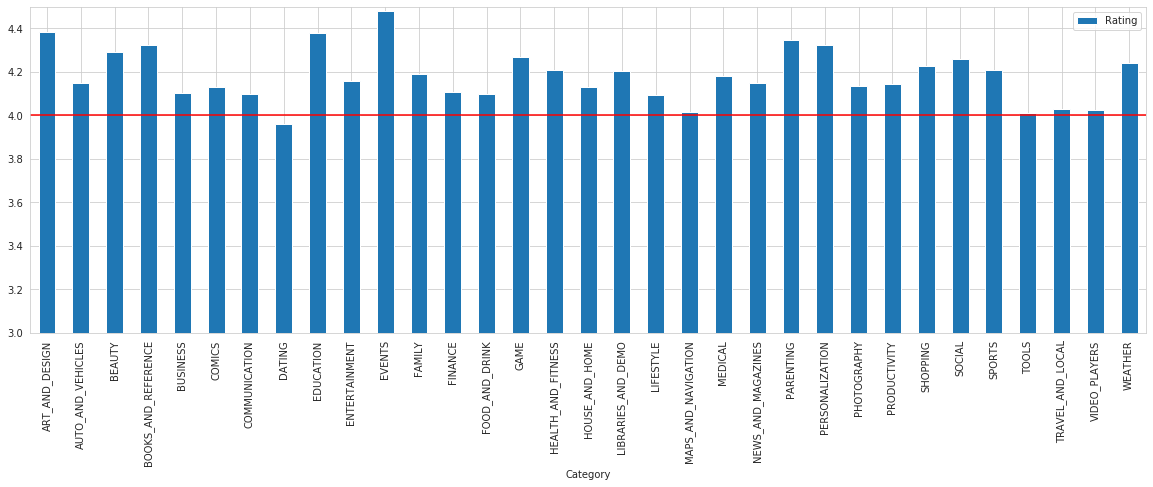

In [0]:
rating = cat_mean.plot(kind='bar', y='Rating', figsize=(20,6))

rating.set_ylim(3, 4.5)

rating.axhline(y=4, color='r')

We can see that Events apps are usually rated very high in the market. Other highly rated categories are Art, Books and Education.

All categories except Dating apps have an average rating above 4. It could either be that people are often frustrated with dating apps, or that these apps tend to have poor design and functionality.

### Additionally, you can look for well made notebooks on kaggle.com. Here is one good example on the Titanic dataset that you can draw inspiration from:

https://www.kaggle.com/ash316/eda-to-prediction-dietanic



### Now it's your turn to explore the data